# Diabetes Detection

In this notebook, I created a model which try to predict the outcome of diabetes case of the patients with logistic regression. I applied the data observing and cleaning processes. 

In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



In [2]:
# extract the .csv file
raw_data = pd.read_csv("./diabetes (2).csv")
raw_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Explore and Clean the Data

In [3]:
# Checking 0 valued features except the "Pregnancies" and "Outcome" which can be 0.
temp = raw_data.drop(labels = ["Pregnancies","Outcome"],axis = 1)
for i in temp.columns:
    print((temp[i] == 0).sum().sum())

5
35
227
374
11
0
0


As we can see there are a lot of non-logical values in the dataset. So we just can't simply drop them. I chose to replace them with their local mean.

In [4]:
for i in temp.columns:
    temp[i] = temp[i].replace(0,round(temp[i].mean(),2))

In [5]:
temp.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.00,79.8,33.6,0.627,50
1,85.0,66.0,29.00,79.8,26.6,0.351,31
2,183.0,64.0,20.54,79.8,23.3,0.672,32
3,89.0,66.0,23.00,94.0,28.1,0.167,21
4,137.0,40.0,35.00,168.0,43.1,2.288,33


In [6]:
# assign these values to the orginal dataframe
raw_data[temp.columns] = temp[temp.columns]
data = raw_data

In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00,79.8,33.6,0.627,50,1
1,1,85.0,66.0,29.00,79.8,26.6,0.351,31,0
2,8,183.0,64.0,20.54,79.8,23.3,0.672,32,1
3,1,89.0,66.0,23.00,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.00,168.0,43.1,2.288,33,1


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681576,72.255013,26.607526,118.660417,32.450768,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115878,9.630580,93.080252,6.875376,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.540000,79.800000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.800000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Checking PDFs

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Count'>

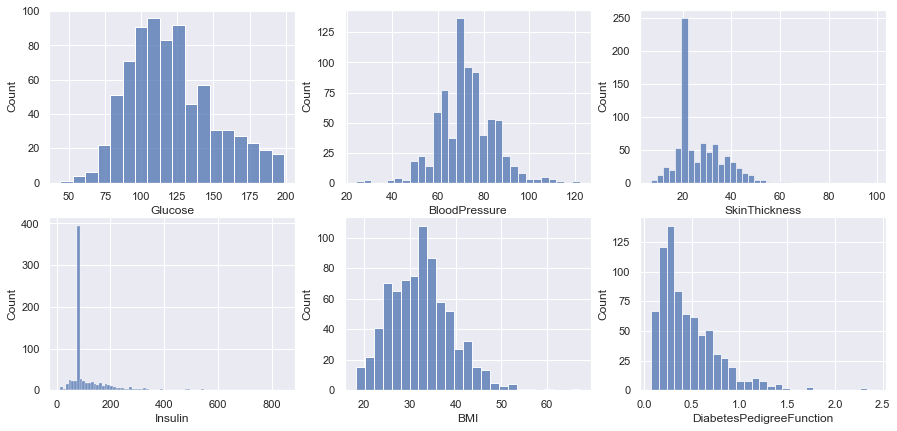

In [9]:
# residual plots of features
fig, ax =plt.subplots(2,3,figsize=(15,7))
sns.histplot(data['Glucose'], ax=ax[0][0])
sns.histplot(data['BloodPressure'], ax=ax[0][1])
sns.histplot(data['SkinThickness'], ax=ax[0][2])
sns.histplot(data['Insulin'], ax=ax[1][0])
sns.histplot(data['BMI'], ax=ax[1][1])
sns.histplot(data['DiabetesPedigreeFunction'], ax=ax[1][2])

Although the other features follow a Normal Distrubition, Insulin and SkinThickness got some spikes in their PDFs. This will confuse our model. I am going to drop the rows which holds both Insulin's and SkinThickness' means.

In [17]:
initial_data  = pd.read_csv("./diabetes (2).csv")
a = round(initial_data["Insulin"].mean(),2)
b = round(initial_data["SkinThickness"].mean(),2)
a,b

(79.8, 20.54)

In [18]:
data = data.drop(raw_data[((raw_data.Insulin == a) & (raw_data.SkinThickness == b))].index)

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

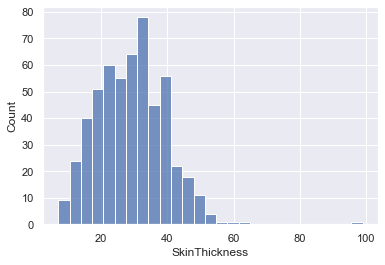

In [19]:
sns.histplot(data['SkinThickness'])

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

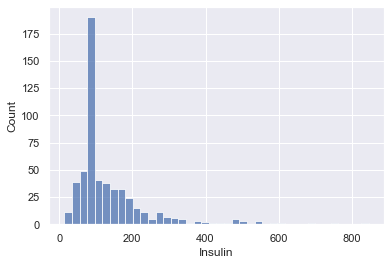

In [20]:
sns.histplot(data['Insulin'])

In [21]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,79.8,33.6,0.627,50,1
1,1,85.0,66.0,29.0,79.8,26.6,0.351,31,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1


Now we have much more appropriate values

## Regression Model

### Declare the inputs and the targets

In [22]:
# The target (dependent variable) is 'Outcome'
targets = data["Outcome"]

# And the inputs are the rest
inputs = data.drop("Outcome",axis = 1)

### Scale the data

In [23]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# I'm going to create an scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [24]:
# Creating new input variable
scaled_inputs = scaler.transform(inputs)

### Train Test Split

In [25]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size=0.2, random_state=42)

### Create the regression

In [26]:
# Import the module for the regression
from sklearn.linear_model import LogisticRegression
# We must use logistic regression because the desired output should be either 1 or 0.

# Create a regression object
log_reg = LogisticRegression()

# Fitted the regression with train data
log_reg.fit(x_train,y_train)

# Find the R-squared of the model
log_reg.score(x_train,y_train)

0.7962962962962963

### Confusion Matrix


In [27]:
from sklearn import metrics
y_pred = log_reg.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[59, 10],
       [17, 23]], dtype=int64)

### Confusion Matrix Evaluation Metrics


In [28]:
# Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7522935779816514
Precision: 0.696969696969697
Recall: 0.575


### Receiver Operating Characteristic(ROC)

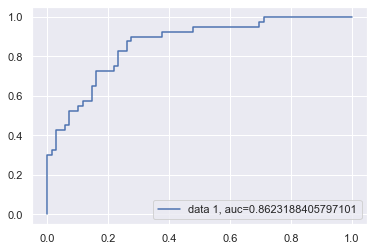

In [29]:
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()